In [8]:
#Question 1

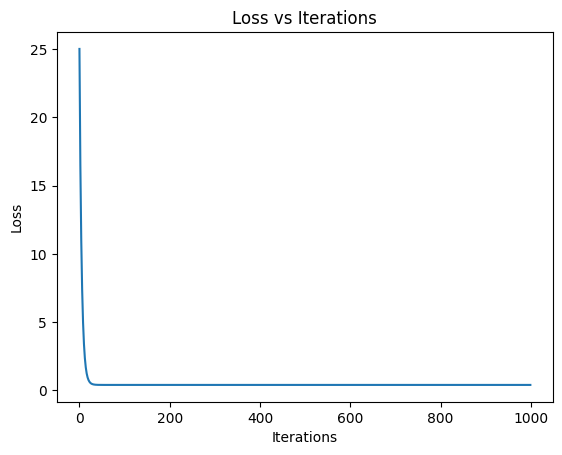

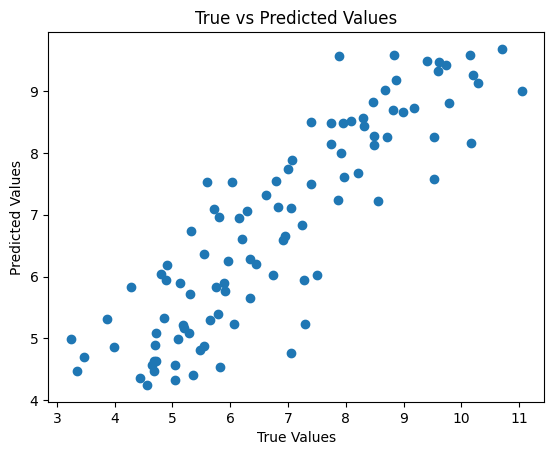

Final weights (theta):
[[6.8200041 ]
 [1.63825904]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

m = 100  # number of samples
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(m)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Compute mean and std
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

# Standardize
X_scaled = (X - X_mean) / X_std

m, n = X_scaled.shape
X_b = np.c_[np.ones((m, 1)), X_scaled]  # shape: (m, n+1)

theta = np.zeros((n + 1, 1))  # weights
learning_rate = 0.1
iterations = 1000
lambda_reg = 0.1  # L2 regularization strength

losses = []

for i in range(iterations):
    y_pred = X_b @ theta
    error = y_pred - y

    # MSE loss + L2 regularization (exclude bias)
    mse = (1 / (2 * m)) * np.sum(error ** 2)
    l2_penalty = (lambda_reg / (2 * m)) * np.sum(theta[1:] ** 2)
    loss = mse + l2_penalty
    losses.append(loss)

    # Gradients
    gradients = (1 / m) * (X_b.T @ error)
    gradients[1:] += (lambda_reg / m) * theta[1:]  # L2 term

    # Update weights
    theta -= learning_rate * gradients

plt.figure()
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()

y_final_pred = X_b @ theta

plt.figure()
plt.scatter(y, y_final_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

print("Final weights (theta):")
print(theta)


In [10]:
#Question 2

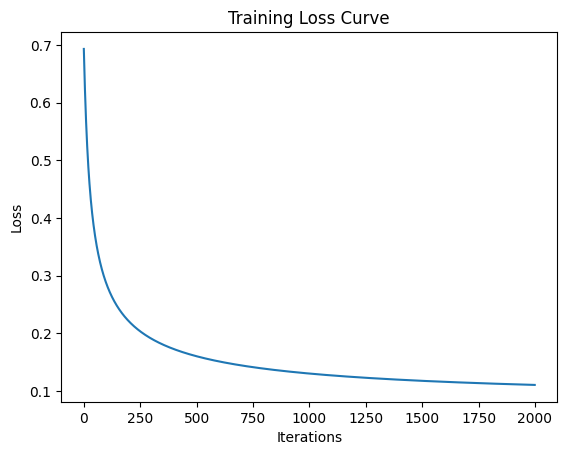

Final Accuracy: 0.995
Final parameters (theta):
[[ 0.63395033]
 [ 3.65701938]
 [-5.44700973]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
#Binary Classification Dataset
np.random.seed(42)

m = 200
X = np.random.randn(m, 2)

# True weights (for data generation)
true_w = np.array([[2], [-3]])
true_b = 0.5

logits = X @ true_w + true_b
probs = 1 / (1 + np.exp(-logits))

y = (probs >= 0.5).astype(int)

y = y.reshape(-1, 1)

#Manual StandardScaler
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

X_scaled = (X - X_mean) / X_std

#Add Bias Term
m, n = X_scaled.shape
X_b = np.c_[np.ones((m, 1)), X_scaled]

#Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Initialize Parameters
theta = np.zeros((n + 1, 1))

learning_rate = 0.1
iterations = 2000
lambda_reg = 0.1

losses = []

#Binary Cross Entropy Loss (with L2)
def binary_cross_entropy(y, y_hat):
    epsilon = 1e-8
    return -np.mean(
        y * np.log(y_hat + epsilon) +
        (1 - y) * np.log(1 - y_hat + epsilon)
    )

#Gradient Descent (Logistic + L2)
for i in range(iterations):
    z = X_b @ theta
    y_hat = sigmoid(z)

    # Loss
    bce = binary_cross_entropy(y, y_hat)
    l2_penalty = (lambda_reg / (2 * m)) * np.sum(theta[1:] ** 2)
    loss = bce + l2_penalty
    losses.append(loss)

    # Gradient
    error = y_hat - y
    gradients = (1 / m) * (X_b.T @ error)
    gradients[1:] += (lambda_reg / m) * theta[1:]

    # Update
    theta -= learning_rate * gradients

#Training Loss Curve
plt.figure()
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

#Predictions & Accuracy
y_pred_prob = sigmoid(X_b @ theta)
y_pred = (y_pred_prob >= 0.5).astype(int)

accuracy = np.mean(y_pred == y)
print("Final Accuracy:", accuracy)

#Final Parameters
print("Final parameters (theta):")
print(theta)


In [12]:
#Question 3

In [13]:
import numpy as np

#Generate Random Matrix M
np.random.seed(42)

n, m = 6, 6
M = np.random.rand(n, m)

k = 3  # number of clusters

print("Matrix M:")
print(M)

#Initialize Centroids (random elements from M)
elements = M.flatten()
centroids = np.random.choice(elements, size=k, replace=False)

#K-Means from Scratch (Element-wise)
max_iters = 100

for _ in range(max_iters):

    # assignment table (same shape as M)
    assignment_table = np.zeros_like(M, dtype=int)

    # dictionary: cluster_index -> list of (i, j)
    cookbook = {i: [] for i in range(k)}

#Assignment Step
    for i in range(n):
        for j in range(m):
            value = M[i, j]
            distances = np.abs(centroids - value)
            cluster = np.argmin(distances)

            assignment_table[i, j] = cluster
            cookbook[cluster].append((i, j))

    #Update Step
    new_centroids = np.zeros(k)

    for cluster in range(k):
        if cookbook[cluster]:
            values = [M[i, j] for (i, j) in cookbook[cluster]]
            new_centroids[cluster] = np.mean(values)
        else:
            new_centroids[cluster] = centroids[cluster]

    # Convergence Check
    if np.allclose(centroids, new_centroids):
        break

    centroids = new_centroids

#Outputs
print("\nAssignment Table:")
print(assignment_table)

print("\nCookbook:")
for key in cookbook:
    print(f"Cluster {key}:", cookbook[key])

print("\nFinal Centroids:")
print(centroids)


Matrix M:
[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735]]

Assignment Table:
[[0 1 1 1 2 2]
 [2 1 1 1 2 1]
 [1 2 2 2 0 0]
 [0 0 1 2 0 0]
 [0 1 2 0 1 2]
 [1 2 2 1 1 1]]

Cookbook:
Cluster 0: [(0, 0), (2, 4), (2, 5), (3, 0), (3, 1), (3, 4), (3, 5), (4, 0), (4, 3)]
Cluster 1: [(0, 1), (0, 2), (0, 3), (1, 1), (1, 2), (1, 3), (1, 5), (2, 0), (3, 2), (4, 1), (4, 4), (5, 0), (5, 3), (5, 4), (5, 5)]
Cluster 2: [(0, 4), (0, 5), (1, 0), (1, 4), (2, 1), (2, 2), (2, 3), (3, 3), (4, 2), (4, 5), (5, 1), (5, 2)]

Final Centroids:
[0.39505821 0.77193241 0.13245364]
